In [2]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

import skimage

from skimage.morphology import watershed, disk, skeletonize
from skimage import measure
from skimage import exposure
from skimage import filters

In [3]:
def histogramAdaptEqualization(myImage):
    adaptedImage = exposure.equalize_adapthist(myImage)
    return adaptedImage

In [4]:
def thresholdImage2(picture):
    #newImage = Image.new(picture.mode, picture.size)
    image = np.asanyarray(picture)
    imageThreshold = filters.threshold_otsu(image)
    image_array = image < imageThreshold
    return image_array

In [5]:
def morphology(skimageImage, operation):
    if operation == 'eroded':
        morphed_image = skimage.morphology.erosion(skimageImage)
        
    if operation == 'dilated':
        morphed_image = skimage.morphology.dilation(skimageImage)

    if operation == 'opened':
        morphed_image = skimage.morphology.opening(skimageImage)
        
    if operation == 'closed':
        morphed_image = skimage.morphology.closing(skimageImage)
    
    return morphed_image

In [6]:
def connected_component_labels(image_array):
    filled_image = ndi.binary_fill_holes(image_array)
    label_image = measure.label(filled_image, background=0)
    thresholded_image = thresholdImage2(label_image)
    plt.figure(figsize=(18, 7))
    ax = plt.subplot(131)
    ax.imshow(image_array, cmap='gray')
    ax.axis('off')
    
    ax2 = plt.subplot(132)
    ax2.imshow(label_image, cmap='nipy_spectral')
    
    ax3 = plt.subplot(133)
    
    counter = 0
    for cell in measure.regionprops(label_image):
        if cell.area>1000:
            center_of_mass_y, center_of_mass_x = cell.centroid
            ax2.scatter(center_of_mass_x, center_of_mass_y, c='white')
        counter = counter + 1
        
    skeletonized_image = skeletonize(image_array)
    ax3.imshow(skeletonized_image, cmap='gray')
    
    plt.tight_layout()
    plt.show()

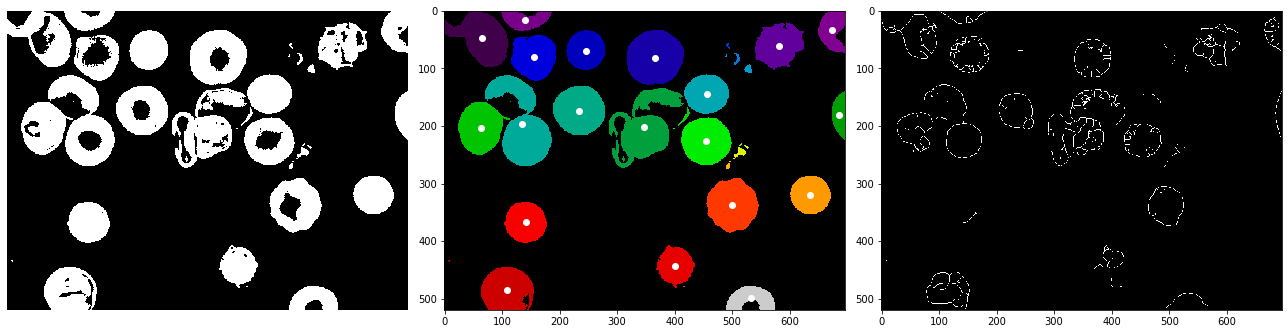

In [13]:
my_image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl1_ch1_p85_t1.tif')
equalized_image = histogramAdaptEqualization(my_image)
thresholded_image = thresholdImage2(equalized_image)
morphed_image = morphology(thresholded_image, 'opened')
connected_component_labels(morphed_image)

In [55]:
def skeletonization(image):
    filled_image = ndi.binary_fill_holes(image)
    label_image = measure.label(image, background=0)
    thresholded_image = thresholdImage2(label_image)
    plt.figure(figsize=(45, 17.5))
    skeletonized_image = skeletonize(image)
    ax3 = plt.subplot(131)
    ax3.imshow(skeletonized_image, cmap='gray')

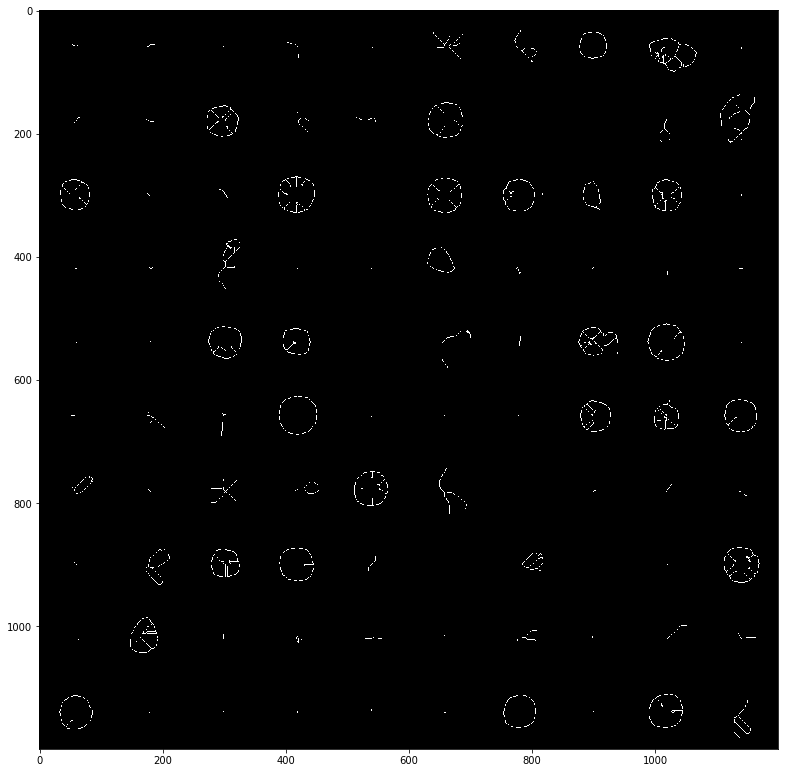

In [56]:
my_image = skimage.io.imread('malariaTile_1_1.tif')
equalized_image = histogramAdaptEqualization(my_image)
thresholded_image = thresholdImage2(equalized_image)
morphed_image = morphology(thresholded_image, 'opened')
skeletonization(morphed_image)

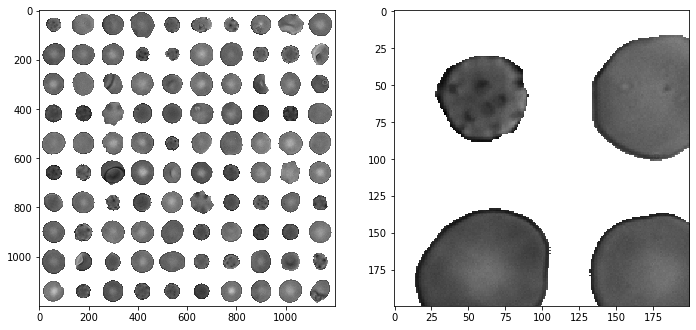

In [81]:
my_image = skimage.io.imread('malariaTile_1_1.tif')
cropped_image = skimage.util.crop(my_image, (0, 1000))
plt.figure(figsize=(18,7))
ax = plt.subplot(131)
ax.imshow(my_image, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(cropped_image, cmap='gray')